# Semantic Textual Similarity Assignment
## SemEval 2012: The First Joint Conference on Lexical and Computational Semantics

**Students:**
- Mario Rosas
- Alam Lopez

**Lab Professor:** Salvador Medina Herrera

## Introduction 

The current assignment is intended to use all the concepts acquired in the Introduction to Human Language Technology class, by replicating the 6th task of the 2012 SemEval with similar conditions that the participants were given. 

The main advantage is that we have full acces to the results' paper where the different approaches porposed are ranked by the three metrics, and the different techniques used for each participants are shown, as well as the corresponding papers for each of the implementations. 

However, the main constraint for this assignment is that it is only allowed to use techniques that were developed by the time of the challenge. This means, that the following approach only consider methods published before June 2012. 



The main task to accomplish is to compute the Semantic Textual Similarity (STS), between various pairs of sentences. In a range from 0-5, where:

- **(5) Completely equivalent**, as they mean the same thing
- **(4) Mostly equivalent**, *but some unimportant details differ.*
- **(3) Roughly equivalent**, *but some important information differs/missing.*
- **(2) Not equivalent**, *but share some details.*
- **(1) Not equivalent**, *but are on the same topic.*
- **(0) On different topics.**

Implementing different approaches:

- a) Explore some lexical dimensions.
- b) Explore the syntactic dimension alone.
- c) Explore the combination of both previous.
- d) Add new components at your choice 

Finally compute the pearson correlation between the predicted similarity versus the ground truth/gold standard (that was provided by human annotation and used a methodology to improve the quality of it). Where the baseline is a p-correlation of 0.31 and the maximum obtained in the contest was 0.75.



# General Steps

We decided to merge the first the approaches a, b, c into the same workflow, and 


1. First we implemented all the functions needed to load the train and test data and preprocess the sentences. That are stored in  https://github.com/MarioROT/IHLT-MAI

2. Then we defined the features to be used in the between sentences in order to describe its similarity or difference.

We inputed the features into a Support Vector Regression / ML classifier, specifically a ...  in order to train our system with the features defined and predict the similarity of test sentences.






### For colab

In [13]:
%%shell
git clone https://github.com/mariorot/IHLT-MAI.git
cd 'IHLT-MAI'
mv 'complementary_material' /content/
mv scripts /content/
pip install svgling
pip install python-crfsuite

UsageError: Cell magic `%%shell` not found.


### Code

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from scripts.compute_metrics import ComputeMetrics
from scripts.text_preprocessing import TextPreprocessing
from scripts.utils import Dataset, ShowResults
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.precision", 4)

# Loading Data

In [16]:
train = Dataset('complementary_material/train/')
test = Dataset('complementary_material/test-gold/')

## Experiments on training data

In [36]:
tp = TextPreprocessing()

dt = test['SMTeuroparl']

# ----- Tokenization -----
# NLTK
dt[2] = tp.tokenize_data(list(dt[0]),'nltk')
dt[3] = tp.tokenize_data(list(dt[1]),'nltk')
# spaCy
dt[4] = tp.tokenize_data(list(dt[0]),'spacy')
dt[5] = tp.tokenize_data(list(dt[1]),'spacy')
# Data cleaning
dt[6]=tp.clean_data(list(dt[0]))
dt[7]=tp.clean_data(list(dt[1]))


# ----- Lemmatization -----
# -- With Tokens
# NLTK
dt[8]=tp.lemmatize_data(list(dt[0]),'nltk',False)
dt[9]=tp.lemmatize_data(list(dt[1]),'nltk',False)
# spaCy
dt[10]=tp.lemmatize_data(list(dt[0]),'spacy')
dt[11]=tp.lemmatize_data(list(dt[1]),'spacy')

# -- With Cleaned data
# NLTK
dt[12]=tp.lemmatize_data(list(dt[6]),'nltk')
dt[13]=tp.lemmatize_data(list(dt[7]),'nltk')
# spaCy
dt[14]=tp.lemmatize_data(list(dt[6]),'spacy')
dt[15]=tp.lemmatize_data(list(dt[7]),'spacy')


# ----- Word Desambiguation -----
# --- With Tokens
# NLTK
dt[16]= tp.wsd_lesk_data(list(dt[2]),'nltk', keep_failures=True, synset_word=True)
dt[17]= tp.wsd_lesk_data(list(dt[3]),'nltk', keep_failures=True, synset_word=True)
# Spacy
dt[18]= tp.wsd_lesk_data(list(dt[4]),'nltk', keep_failures=True, synset_word=True)
dt[19]= tp.wsd_lesk_data(list(dt[5]),'nltk', keep_failures=True, synset_word=True)
# Cleaned data
dt[20]= tp.wsd_lesk_data(list(dt[6]),'nltk', keep_failures=True, synset_word=True)
dt[21]= tp.wsd_lesk_data(list(dt[7]),'nltk', keep_failures=True, synset_word=True)

# --- With Lemmas
# NLTK Lemmas
dt[22]= tp.wsd_lesk_data(list(dt[8]),'nltk', keep_failures=True, synset_word=True)
dt[23]= tp.wsd_lesk_data(list(dt[9]),'nltk', keep_failures=True, synset_word=True)
# Spacy Lemmas
dt[24]= tp.wsd_lesk_data(list(dt[10]),'nltk', keep_failures=True, synset_word=True)
dt[25]= tp.wsd_lesk_data(list(dt[11]),'nltk', keep_failures=True, synset_word=True)
# Cleaned NLTK Lemmas
dt[26]= tp.wsd_lesk_data(list(dt[12]),'nltk', keep_failures=True, synset_word=True)
dt[27]= tp.wsd_lesk_data(list(dt[13]),'nltk', keep_failures=True, synset_word=True)
# Cleaned SpaCy Lemmas
dt[28]= tp.wsd_lesk_data(list(dt[14]),'nltk', keep_failures=True, synset_word=True)
dt[29]= tp.wsd_lesk_data(list(dt[15]),'nltk', keep_failures=True, synset_word=True)


# ----- Named Entities -----
# --- With Tokens
# NLTK
dt[30]= tp.named_entities_data(list(dt[0]), 'nltk', False)
dt[31]= tp.named_entities_data(list(dt[1]), 'nltk', False)
# SpaCy
dt[32]= tp.named_entities_data(list(dt[0]), 'spacy')
dt[33]= tp.named_entities_data(list(dt[1]), 'spacy')
# Cleaned data
# NLTK
dt[34]= tp.named_entities_data(list(dt[6]), 'nltk')
dt[35]= tp.named_entities_data(list(dt[7]), 'nltk')
# SpaCy
dt[36]= tp.named_entities_data(list(dt[6]), 'spacy')
dt[37]= tp.named_entities_data(list(dt[7]), 'spacy')

# --- With Lemmas
# NLTK
dt[38]= tp.named_entities_data(list(dt[8]), 'nltk')
dt[39]= tp.named_entities_data(list(dt[9]), 'nltk')

dt[40]= tp.named_entities_data(list(dt[8]), 'spacy')
dt[41]= tp.named_entities_data(list(dt[9]), 'spacy')
# SpaCy
dt[42]= tp.named_entities_data(list(dt[10]), 'nltk')
dt[43]= tp.named_entities_data(list(dt[11]), 'nltk')

dt[44]= tp.named_entities_data(list(dt[10]), 'spacy')
dt[45]= tp.named_entities_data(list(dt[11]), 'spacy')
# Cleaned data
# NLTK
dt[46]= tp.named_entities_data(list(dt[12]), 'nltk')
dt[47]= tp.named_entities_data(list(dt[13]), 'nltk')

dt[48]= tp.named_entities_data(list(dt[12]), 'spacy')
dt[49]= tp.named_entities_data(list(dt[13]), 'spacy')
# SpaCy
dt[50]= tp.named_entities_data(list(dt[14]), 'nltk')
dt[51]= tp.named_entities_data(list(dt[15]), 'nltk')

dt[52]= tp.named_entities_data(list(dt[14]), 'spacy')
dt[53]= tp.named_entities_data(list(dt[15]), 'spacy')

# -- Metrics computation
pairs = {'nltk_token':[2,3], 'spacy_token':[4,5], 'clean_token':[6,7], # Tokens
         'nltk_lemma':[8,9], 'spacy_lemma':[10,11], 'clean_nltk_lemma':[12,13], 'clean_spacy_lemma':[14,15], # Lemmas
         'nltk_token_wsd':[16,17], 'spacy_token_wsd':[18,19], 'clean_token_wsd':[20,21], # WSD
         'nltk_lemma_wsd':[22,23], 'spacy_lemma_wsd':[24,25], 'clean_nltk_lemma_wsd':[26,27], 'clean_spacy_lemma_wsd':[28,29], #WSD
         'nltk_ne':[30,31],  'spacy_ne':[32,33],  'clean_nltk_ne':[34,35],  'clean_spacy_ne':[36,37], #Named Entities
         'nltk_lemmas_-_nltk_ne':[38,39],  'nltk_lemmas_-_spacy_ne':[40,41],  'spacy_lemmas_-_nltk_ne':[42,43],  'spacy_lemmas_-_spacy_ne':[44,45], #Named Entities
         'clean_nltk_lemmas_-_nltk_ne':[46,47],  'clean_nltk_lemmas_-_spacy_ne':[48,49],  'clean_spacy_lemmas_-_nltk_ne':[50,51],  'clean_spacy_lemmas_-_spacy_ne':[52,53] #Named Entities
        }

metrics = ['jaccard', 'cosine', 'overlap', 'dice']
mets_results = {k:{} for k in metrics}
mets_results['gs'] = dt['gs']

for name, values in pairs.items():
    met_results = ComputeMetrics(dt[values].to_numpy(), metrics).do()
    for metric in metrics:
        mets_results[metric][name] = met_results[metric]

sr = ShowResults(mets_results, {'Tokenization':'token', 'Lemmatization':'lemma', 'Word Sense Disambiguation':'wsd', 'Named Entities':'ne'}, False)

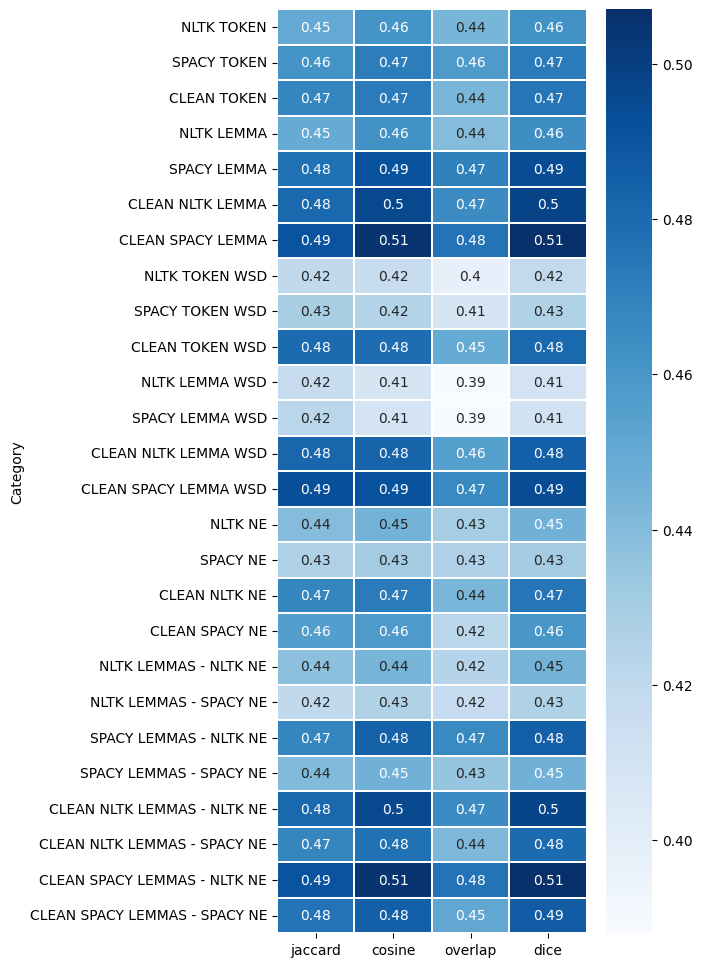

In [37]:

sns.heatmap(sr.dataframe.set_index('Category'), annot=True, linewidths=0.3,cmap='Blues',yticklabels=True)
plt.gcf().set_size_inches(5,12)
plt.show()

In [18]:
mets_results['gs'] = dt['gs']
mets_results['gs']

0      4.500
1      5.000
2      4.250
3      4.500
4      5.000
       ...  
454    5.000
455    4.750
456    5.000
457    4.000
458    3.833
Name: gs, Length: 459, dtype: float64

In [6]:
sr = ShowResults(mets_results, {'Tokenization':'token', 'Lemmatization':'lemma', 'Word Sense Disambiguation':'wsd', 'Named Entities':'ne'},False)


--- Results for Tokenization
+-------------+---------+--------+---------+-------+
|   Category  | jaccard | cosine | overlap |  dice |
+-------------+---------+--------+---------+-------+
|  NLTK TOKEN |   0.45  | 0.461  |  0.444  | 0.462 |
| SPACY TOKEN |  0.461  | 0.472  |  0.458  | 0.473 |
| CLEAN TOKEN |  0.468  | 0.473  |  0.443  | 0.475 |
+-------------+---------+--------+---------+-------+

--- Results for Lemmatization
+-------------------+---------+--------+---------+-------+
|      Category     | jaccard | cosine | overlap |  dice |
+-------------------+---------+--------+---------+-------+
|     NLTK LEMMA    |  0.449  | 0.462  |   0.44  | 0.464 |
|    SPACY LEMMA    |  0.477  | 0.492  |   0.47  | 0.494 |
|  CLEAN NLTK LEMMA |  0.481  | 0.496  |  0.465  | 0.498 |
| CLEAN SPACY LEMMA |  0.491  | 0.505  |  0.476  | 0.507 |
+-------------------+---------+--------+---------+-------+

--- Results for Word Sense Disambiguation
+-----------------------+---------+--------+---------

# Conclusion

Until now we have tried to compute similarity of the STS task applying different levels of text preprocessing chaining different process as the preprocessing becomes more complex:

1.   Tokenization\
    a. NLTK tokenizer\
    b. spaCy tokenizer\
    c. Manual cleaning process
2.  Lemmatization\
    a. NLTK tokenizer + NLTK lemmatizer\
    b. spaCy tokenizer + spaCy lemmatizer\
    c. Manual cleaning + NLTK lemmatizer\
    d. Manual cleaning + spaCy lemmatizer
3. Word Sense Disambiguation (WSD)\
    a. NLTK tokenizer + WSD NLTK\
    b. spaCy tokenizer + WSD NLTK\
    c. Manual Cleaning + WSD NLTK\
    d. NLTK tokenizer + NLTK lemmatizer + WSD NLTK\
    e.spaCy tokenizer + spaCy lemmatizer + WSD NLTK\
    f. Manual cleaning + NLTK lemmatizer + WSD NLTK\
    g. Manual cleaning + spaCy lemmatizer + WSD NLTK
4. Word Sequences - Named Entities (NE) < ----------------------------------- THIS LAB SESION\
    a. NLTK tokenizer + NE NLTK\
    b. spaCy tokenizer + NE spaCy\
    c. Manual cleaning  + NE NLTK\
    d. Manual cleaning + Ne spaCy\
    e. NLTK tokenizer + NLTK lemmatizer + NE NLTK\
    f. NLTK tokenizer + NLTK lemmatizer + NE spaCy\
    g. spaCy tokenizer + spaCy lemmatizer + NE NLTK\
    h. spaCy tokenizer + spaCy lemmatizer + NE spaCy\
    i. Manual cleaning + NLTK lemmatizer + NE NLTK\
    j. Manual cleaning + NLTK lemmatizer + NE spaCy\
    k. Manual cleaning + spaCy lemmatizer + NE NLTK\
    l. Manual cleaning + spaCy lemmatizer + NE spaCy\



In this last excercise we extracted the named entities (with NLTK and spaCy implementations) and joined them as a single entity within the sentences. We applied these to the resulting sentences of previous processing techniques.

Furthermore, we enhanced our Word Sense Disambiguation (WSD) implementation from the preceding lab. We introduced the capability to decide whether to retain words for which the WSD technique is inapplicable. Additionally, we incorporated the option to select between directly comparing the synset objects or solely the word substrings within the synset. (Thus, better results were obtained in the similarity measures when applying this technique.)


It appears that using the "CLEAN" approach, which includes lowercasing, removing stopwords, punctuation, and short words, led to the highest STS values in general. This suggests that effective text cleaning and preprocessing can improve semantic similarity measurements.


Generally, the use od lemmatization improved results compared to tokenization alone. Throughout most of the sessions, the approach using SpaCy's lemmatization achieved the highest similarity values, which suggests that SpaCy's lemmatization method may be more effective for the data .


The results of applying WSD, after the last modification, seem to be less consistent in terms of improvement, with some cases performing worse. "CLEAN SPACY LEMMA" with manual cleaning, SpaCy's lemmatization and word sense disambiguation showed the highest values, indicating that combining cleaning, lemmatization with WSD can be effective for improving STS.


In this lab session applying the Word Sequences technique, the results  show that its impact can be mixed, with some combinations performing better than others. Again, using manual cleaning + spaCy lemmas produced the highest STS values in the named entities category. However, in all cases, the NLTK's named entity extraction and merging process obtained higher values.
It's worth noting that in some cases, the word sequences technique, may enhance similarity measurements, while in others, it might not provide significant benefits.

According to the increase in the value of the Pearson correlation as the techniques are chained we can verify that effective text preprocessing is crucial for improving semantic textual similarity measurements. The overall results continue to support the application of manual cleaning + spaCy lemmas for more complex techniques. While the best NE result did not outperform the best WSD result (with the latest update), bot areh effective for improving our similarity measurement process. However, the choice of the best preprocessing pipeline may depend on the specific goal.It is concluded then, that the unification of named entities can be valuable, but its impact may vary depending on the preprocessing pipeline chosen.



